# Testing out the functionality of Dropouts

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

## Loading dataset

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255

In [4]:
pixel_mean = x_train.mean(axis = 0, keepdims = True)
pixel_std = x_train.std(axis = 0, keepdims = True)
x_train_scaled = (x_train - pixel_mean) / pixel_std
x_valid_scaled = (x_valid - pixel_mean) / pixel_std
x_test_scaled = (x_test - pixel_mean) / pixel_std

## Building, compiling, training and evaluating the model

In [5]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(300, activation = keras.activations.elu, kernel_initializer = keras.initializers.he_normal))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(100, activation = keras.activations.elu, kernel_initializer = keras.initializers.he_normal))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [8]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(), metrics = 'accuracy')

In [9]:
history = model.fit(x_train_scaled, y_train, epochs = 5, validation_data = (x_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5699 - accuracy: 0.8038 - val_loss: 0.3663 - val_accuracy: 0.8650
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4227 - accuracy: 0.8445 - val_loss: 0.3418 - val_accuracy: 0.8714
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3924 - accuracy: 0.8550 - val_loss: 0.3410 - val_accuracy: 0.8742
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8621 - val_loss: 0.3186 - val_accuracy: 0.8830
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3615 - accuracy: 0.8649 - val_loss: 0.3101 - val_accuracy: 0.8826


In [10]:
df_metrics = pd.DataFrame(history.history)

<AxesSubplot:>

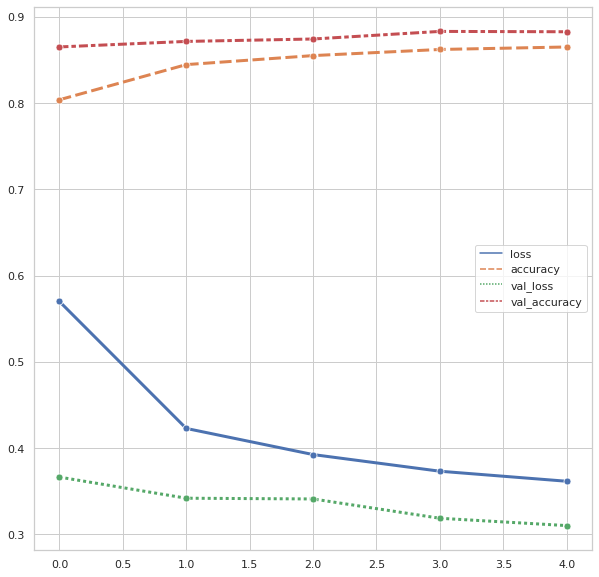

In [11]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics, linewidth = 3, marker = 'o', markersize = 7)

In [12]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8702


[0.3483121693134308, 0.870199978351593]

## Alpha dropout

- In case we are employing SELU activation func, we need to use alpha dropout in order to avoid breaking the self-normalization.

In [25]:
keras.backend.clear_session()

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.AlphaDropout(rate = 0.2))
model.add(keras.layers.Dense(300, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal))
model.add(keras.layers.AlphaDropout(rate = 0.2))
model.add(keras.layers.Dense(100, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal))
model.add(keras.layers.AlphaDropout(rate = 0.2))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
alpha_dropout_1 (AlphaDropou (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
alpha_dropout_2 (AlphaDropou (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [28]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True), metrics = 'accuracy')

In [29]:
history = model.fit(x_train_scaled, y_train, epochs = 20, validation_data = (x_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6694 - accuracy: 0.7569 - val_loss: 0.6055 - val_accuracy: 0.8354
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5538 - accuracy: 0.7966 - val_loss: 0.5484 - val_accuracy: 0.8484
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5275 - accuracy: 0.8047 - val_loss: 0.5065 - val_accuracy: 0.8530
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5080 - accuracy: 0.8121 - val_loss: 0.4600 - val_accuracy: 0.8632
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4924 - accuracy: 0.8178 - val_loss: 0.4485 - val_accuracy: 0.8554
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4799 - accuracy: 0.8201 - val_loss: 0.4434 - val_accuracy: 0.8580
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4730 - accuracy: 0.8242 - val_loss: 0.4697 - val_accuracy:

In [30]:
df_metrics = pd.DataFrame(history.history)

<AxesSubplot:>

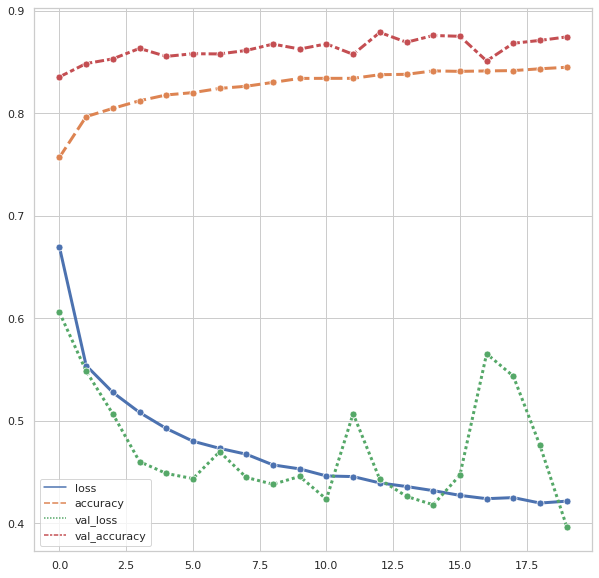

In [31]:
plt.figure(figsize = (10, 10))
sns.lineplot(data = df_metrics, linewidth = 3, marker = 'o', markersize = 7)

In [32]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 979us/step - loss: 0.4344 - accuracy: 0.8656


[0.4344313442707062, 0.8655999898910522]

In [33]:
model.evaluate(x_train_scaled, y_train)

1719/1719 [==============================] - 2s 937us/step - loss: 0.3249 - accuracy: 0.88760s - loss: 0.3202 -  - ETA: 0s - loss: 0.3246 - accuracy: 


[0.3249233067035675, 0.8876363635063171]

In [34]:
model.fit(x_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.4208 - accuracy: 0.8413


## MC Dropout

- We will be making 100 predictions using the test set and the above trained model. 
- Since we are using dropouts, all the 100 predictions will be different.

In [53]:
tf.random.set_seed(42)
np.random.seed(42)

In [54]:
y_preds = np.stack([model(x_test_scaled, training = True) for sample in range(100)])
y_pred = y_preds.mean(axis = 0)

In [55]:
y_std = y_pred.std(axis = 0)

- Lets predict the 1 instance of the test set with dropout off

In [56]:
np.round(model.predict(x_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

- The model is almost certain that the instance belongs to class 9 ankle boot.
- Now lets see what the MC predictions say about the same instance.

In [57]:
np.round(y_preds[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.37, 0.  , 0.55]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.7 , 0.  , 0.27]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.54, 0.  , 0.01, 0.  , 0.46]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.31, 0.  , 0.56]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.41, 0.  , 0.58]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.08, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.47, 0.  , 0.52]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.46, 0.  , 0.25, 0.  , 0.29]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.07, 0.  , 0.79]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.38, 0.  , 0.3 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.05, 0.  , 0

In [58]:
np.round(y_pred[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.18, 0.  , 0.72]],
      dtype=float32)

- Here the model even though it prefers class 9 as it shows some sense of belonging to classes 5(sandals) and 7(sneakers), which makes sense ass they all are footwears. 
- On averaging all the 100 predictions we can see that the model still thinks it belongs to class 9 but with a 72% confidence instead of 99% which seems reasonable.
- It is also useful to know which other classes the model thinks it belongs to.

In [59]:
y_std = y_preds.std(axis = 0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.22, 0.  , 0.27]],
      dtype=float32)

- We can see that there is a lot of variance in the estimates.

In [61]:
y_pred.shape

(10000, 10)

In [64]:
y_prediction = np.argmax(y_pred, axis = 1)

In [67]:
accuracy = np.sum(y_prediction == y_test) / len(y_test)

In [68]:
accuracy

0.864

- If the model contains other layers that behave in a special way during training like batch normalization, we should not force train the model like we did above.
- Instead we should replace the Dropout layers with the following MCDropout class which subclasses the Dropout class.
- Here we just subclass the Dropout class and then modify the call method to force its training argument to True.

In [70]:
class MC_Dropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training = True)

In [71]:
class MC_Alpha_Dropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training = True)

In [72]:
mc_model = keras.models.Sequential()
[mc_model.add(MC_Alpha_Dropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer) for layer in model.layers]

[None, None, None, None, None, None, None]

In [73]:
mc_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
mc__alpha__dropout (MC_Alpha (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
mc__alpha__dropout_1 (MC_Alp (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
mc__alpha__dropout_2 (MC_Alp (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [75]:
mc_model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True), metrics = ['accuracy'])

In [76]:
mc_model.set_weights(model.get_weights())

In [78]:
np.round(np.mean([mc_model.predict(x_test_scaled[:1]) for sample in range(100)], axis = 0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.18, 0.01, 0.69]],
      dtype=float32)